In [1]:
from src import openpopcon as op
import numpy as np
import matplotlib.pyplot as plt
# switch backend to pyqt

In [2]:
settingsfile = "./resources/examples/NSF_NT_CMOD/POPCON_input_example.yaml"
plotsettingsfile = "./resources/examples/NSF_NT_CMOD/plotsettings.yml"
scalinglawfile = "./resources/scalinglaws.yml"

pc = op.POPCON(settingsfile=settingsfile, plotsettingsfile=plotsettingsfile, scalinglawfile=scalinglawfile)

[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_Zeffs-13.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_Zeffs-13.py310.1.nbc'
[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_reactivity-344.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_reactivity-344.py310.1.nbc'
[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_reactivity-344.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_reactivity-344.py310.2.nbc'
[cache] index loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_reactivity-344.py310.nbi'
[cache] data loaded from '/Users/pharr/Projects/OpenPOPCON/src/lib/__pycache__/phys_lib.get_reactivity-344.py310.3.nbc'
[cache] index loaded from '/Users/pharr/Projects/OpenPOP

In [3]:
pc.single_popcon(plot=False)

Plotting Paux
Plotting Pfusion
Plotting Prad
Plotting Q
Plotting H98
Plotting betaN


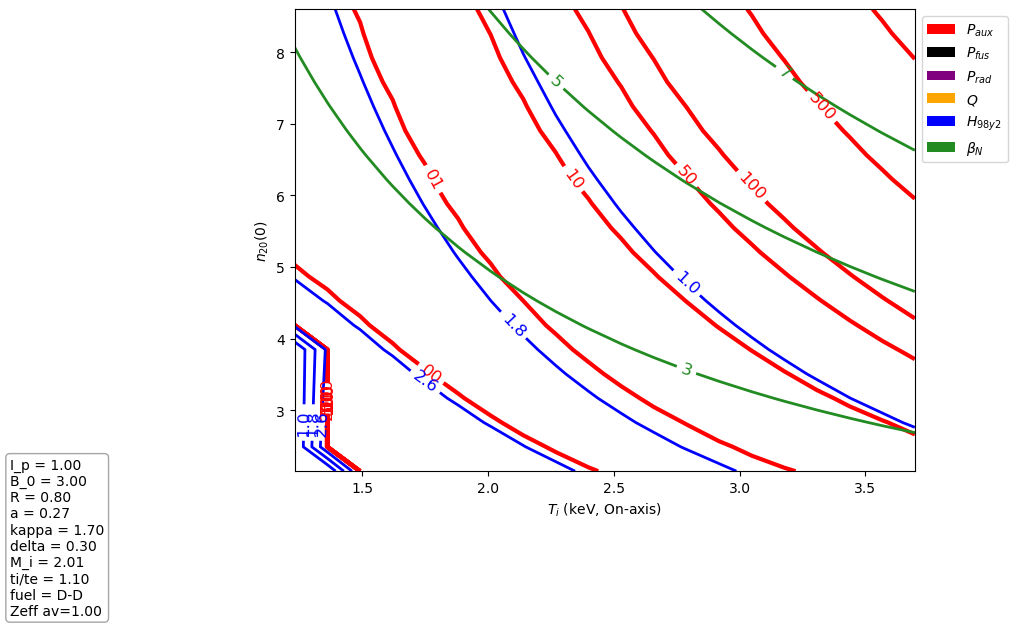

In [4]:
pc.update_plotsettings()
pc.plot(-1,show=True)


Params:
n_i_average = 2.1831948476180068 x 10^20 m^-3
n_e_average = 2.183 x 10^20 m^-3
n_G = 4.366 x 10^20 m^-3
n_i_axis = 3.584 x 10^20 m^-3
n_e_axis = 3.584 x 10^20 m^-3
Ti_average = 0.3 keV
Ti_axis = 0.7 keV
Solution:
P_aux = 0.03 MW
P_fusion = 0.00 MW
P_SOL = nan MW
P_load = nan MW/m^2
P_ohmic = 0.009 MW
P_rad = nan MW
P_heat = 0.04 MW
P_alpha = 0.00 MW
P_dd = 0.000 MW
P_dt = 0.00 MW
Wtot/TauE = 0.02 MW
f_rad = nan 
tauE = 4.524 s
Q = 0.000 MW
H89 = 13.83
H98 = 3.09
vloop = 0.0085 V
betaN = 0.859



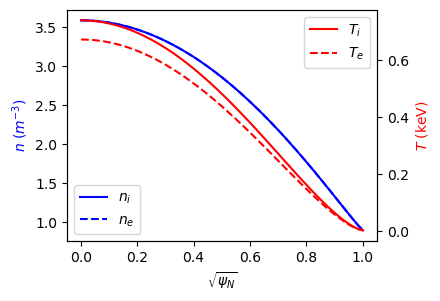

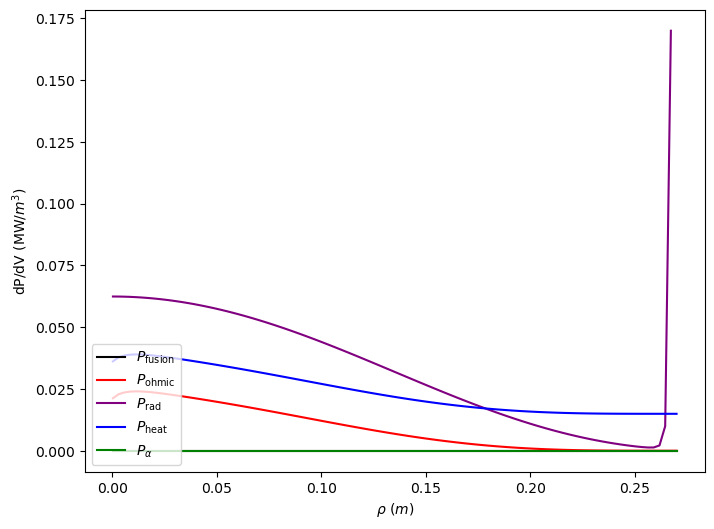

In [5]:
pc.single_point(-1,0.5,.3)

In [6]:
import os
os.path.abspath(__file__)

NameError: name '__file__' is not defined

In [9]:
i_params = -1
n_G_frac = 0.5
Ti_av = 0.3

n_G = pc.params[i_params].n_GR
rho = pc.params[i_params].sqrtpsin
n_e_avg_fac = pc.params[i_params].volume_integral(rho, pc.params[i_params].get_extprof(rho, 1))/pc.params[i_params].V
n_e_20 = n_G_frac*n_G/n_e_avg_fac
T_i_avg_fac = pc.params[i_params].volume_integral(rho, pc.params[i_params].get_extprof(rho, 3))/pc.params[i_params].V
n_i_avg_fac = pc.params[i_params].volume_integral(rho, pc.params[i_params].get_extprof(rho, 2))/pc.params[i_params].V
T_i_keV = Ti_av/T_i_avg_fac
T_e_keV = T_i_keV/pc.params[i_params].tipeak_over_tepeak
dil = pc.params[i_params].get_plasma_dilution(T_e_keV)
n_i_20 = n_e_20*dil
line_avg_fac = np.average(pc.params[i_params].get_extprof(rho, 1))



In [9]:
Paux = pc.params[i_params].P_aux_relax_impfrac(n_e_20,T_i_keV,pc.settings.accel,pc.settings.err,pc.settings.maxit)

Power balance relaxation solver did not converge in 100000 iterations in state n20= 3.5840692177666718 T= 2.4645321399824995 keV.


In [29]:
P_aux_iter = 1000
T_e_keV = T_i_keV/pc.params[-1].tipeak_over_tepeak
dil = pc.params[-1].get_plasma_dilution(T_e_keV)
n_i_20 = n_e_20*dil
line_average_fac = np.average(pc.params[-1].get_extprof(pc.params[-1].sqrtpsin, 1))
dPaux: float
P_fusion_heating_iter = pc.params[-1].volume_integral(pc.params[-1].sqrtpsin, pc.params[-1]._P_fusion_heating(pc.params[-1].sqrtpsin, T_i_keV, n_i_20))
P_ohmic_heating_iter = pc.params[-1].volume_integral(pc.params[-1].sqrtpsin, pc.params[-1]._P_OH_prof(pc.params[-1].sqrtpsin, T_e_keV, n_e_20))
W_tot_iter = pc.params[-1].volume_integral(pc.params[-1].sqrtpsin, pc.params[-1]._W_tot_prof(pc.params[-1].sqrtpsin, T_i_keV, n_e_20))
# P_rad_iter = pc.params[-1].volume_integral(pc.params[-1].sqrtpsin, pc.params[-1]._P_rad(pc.params[-1].sqrtpsin, T_e_keV, n_e_20))
P_brem_iter = pc.params[-1].volume_integral(pc.params[-1].sqrtpsin, pc.params[-1]._P_brem_rad(pc.params[-1].sqrtpsin, T_e_keV, n_e_20))
P_imp_iter = pc.params[-1].volume_integral(pc.params[-1].sqrtpsin, pc.params[-1]._P_impurity_rad(pc.params[-1].sqrtpsin, T_e_keV, n_e_20))
err = 1e-6

In [30]:
accel = 2
pauxs = []
for ii in np.arange(20):
    # Power in
    P_totalheating_iter = P_aux_iter + P_ohmic_heating_iter + P_fusion_heating_iter - P_brem_iter
    # print()
    # print("P_fusion = ", P_fusion_heating_iter)
    # print("P_ohmic = ", P_ohmic_heating_iter)
    # print("P_aux =", P_aux_iter)
    # print()
    # Power out
    tauE_iter = pc.params[-1].tauE_scalinglaw(P_totalheating_iter, n_e_20*line_average_fac)
    P_confinement_loss_iter = W_tot_iter/tauE_iter
    P_totalloss_iter = P_confinement_loss_iter
    # print("W_tot =", W_tot_iter)
    # print("tauE =", tauE_iter)
    # print("P_rad =", P_rad_iter)
    # print("P_confinement =", P_confinement_loss_iter)
    # print('-------------------------------------------------')
    # Power balance
    pauxs.append(P_aux_iter)
    dPaux = P_totalloss_iter - P_totalheating_iter

    print("P_aux =", P_aux_iter)
    print("P_loss =", P_totalloss_iter)
    print("P_heat =", P_totalheating_iter)
    print("dPaux =", dPaux)
    if -dPaux*accel > P_aux_iter:
        print("P_aux too negative")
        P_aux_iter -= 0.9*P_aux_iter
    else:
        P_aux_iter += accel*dPaux
    if P_aux_iter < -(P_ohmic_heating_iter + P_fusion_heating_iter - P_brem_iter):
        P_aux_iter = P_brem_iter
    print("New P_aux =", P_aux_iter)
    print()

    # print("\n\n------------------------------------")
    # print("P_heat =", P_totalheating_iter)
    # print("P_heat_tot =", P_totalheating_iter)
    # print("P_loss =", P_totalloss_iter)

    if P_aux_iter < 1.0:
        if np.abs(dPaux/1.0) < err:
            break
    else:
        if np.abs(dPaux/P_aux_iter) < err:
            break
print(ii)

P_aux = 1000
P_loss = 140.77912403415644
P_heat = 999.9715330896619
dPaux = -859.1924090555054
P_aux too negative
New P_aux = 100.0

P_aux = 100.0
P_loss = 18.131728827557975
P_heat = 99.97153308966196
dPaux = -81.83980426210398
P_aux too negative
New P_aux = 10.0

P_aux = 10.0
P_loss = 2.3304907513746533
P_heat = 9.971533089661966
dPaux = -7.6410423382873125
P_aux too negative
New P_aux = 1.0

P_aux = 1.0
P_loss = 0.2933502908078104
P_heat = 0.9715330896619657
dPaux = -0.6781827988541553
P_aux too negative
New P_aux = 0.09999999999999998

P_aux = 0.09999999999999998
P_loss = 0.02877799131331697
P_heat = 0.07153308966196562
dPaux = -0.04275509834864864
New P_aux = 0.03701582233540906

P_aux = 0.03701582233540906
P_loss = 0.00434460117363256
P_heat = 0.008548911997374696
dPaux = -0.004204310823742136
New P_aux = 0.028607200687924786

P_aux = 0.028607200687924786
P_loss = 0.00011204797249009898
P_heat = 0.00014029034989042344
dPaux = -2.8242377400324457e-05
New P_aux = 0.0285507159331241

In [19]:
dPaux

nan

In [83]:
pauxs

[100,
 -1.6514486418981136,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [80]:
np.trapz(Jr*pc.params[-1].Ip,2*np.pi*1.4*(pc.params[-1].a*np.linspace(1e-3,1,1000))**2) 

NameError: name 'Jr' is not defined

In [ ]:
eta = pc.params[-1].get_eta_NC(np.linspace(1e-3,1.,1000),22,1.9)
r = np.linspace(1e-3,1,1000)*pc.params[-1].a
Ar = np.pi*r**2*pc.params[-1].kappa

etaavg = np.trapz(eta, Ar) / Ar[-1]

In [13]:
etaavg

1.4565013119671069e-08

In [14]:
pc.params[-1].volume_integral(np.linspace(1e-3,1.,1000),eta*Jr*1e6)/pc.params[-1].volume_integral(np.linspace(1e-3,1.,1000), np.ones(1000))

6.429860244011536e-05

In [15]:
pc.params[-1].volume_integral(np.linspace(1e-3,1.,1000), np.ones(1000))

186.91906239142062

In [16]:
eta*Jr*pc.params[-1].Ip*1e6

array([1.60810176e-03, 1.62512335e-03, 1.63838314e-03, 1.64969850e-03,
       1.65977307e-03, 1.66896758e-03, 1.67749622e-03, 1.68549850e-03,
       1.69307128e-03, 1.70028505e-03, 1.70719303e-03, 1.71356846e-03,
       1.71968294e-03, 1.72558984e-03, 1.73131116e-03, 1.73686527e-03,
       1.74226774e-03, 1.74753184e-03, 1.75266904e-03, 1.75768932e-03,
       1.76260141e-03, 1.76716553e-03, 1.77158014e-03, 1.77590626e-03,
       1.78014935e-03, 1.78431432e-03, 1.78840563e-03, 1.79242732e-03,
       1.79638308e-03, 1.80027629e-03, 1.80411003e-03, 1.80766636e-03,
       1.81108600e-03, 1.81445414e-03, 1.81777300e-03, 1.82104465e-03,
       1.82427099e-03, 1.82745382e-03, 1.83059482e-03, 1.83369556e-03,
       1.83675750e-03, 1.83959096e-03, 1.84227983e-03, 1.84493462e-03,
       1.84755645e-03, 1.85014637e-03, 1.85270536e-03, 1.85523437e-03,
       1.85773430e-03, 1.86020600e-03, 1.86265028e-03, 1.86490773e-03,
       1.86700685e-03, 1.86908210e-03, 1.87113410e-03, 1.87316342e-03,
      

In [17]:
pc.params[-1].volume_integral(np.linspace(0.0001,1,100),pc.params[-1]._P_OH_prof(np.linspace(0.0001,1,100),22,1.9))

3.1102368492407275

In [18]:
pc.params[-1].

SyntaxError: invalid syntax (1816939382.py, line 1)

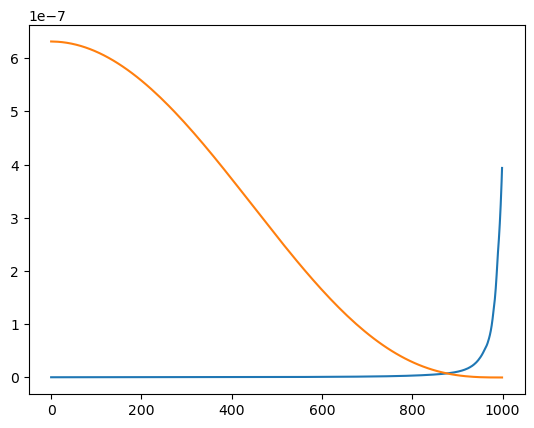

In [22]:
plt.plot(pc.params[-1].get_eta_NC(np.linspace(1e-3, 1, 1000),20,1.9))
plt.plot(Jr/500000)

In [9]:
pc.params[-1].get_Vloop(22,1.9)

0.00012464532822256346

In [11]:
pc.params[-1].V

159.0948987619956

In [12]:
pc.params[-1].agrid

array([  0.        ,   5.48390066,  19.24294004,  31.19223176,
        40.61503514,  51.16872718,  63.39425523,  73.16129108,
        83.81676324,  94.93912681, 104.89499338, 116.53753563,
       127.3350497 , 137.68678083, 148.65070682, 159.47774705,
       170.738411  , 181.84831996, 192.71318646, 204.1750246 ,
       214.61007754, 226.33386304, 237.24274361, 248.67947271,
       260.46077415, 272.03874777, 283.32552564, 295.21296782,
       306.64223527, 318.84173294, 330.72728046, 343.06512261,
       354.92288648, 367.36482733, 380.56648316, 392.57190208,
       405.72072216, 419.24642901, 432.41947977, 446.9674669 ,
       461.16306474, 477.17461767, 493.20559888, 510.49077186,
       528.62902588, 547.90132839, 568.60114319, 592.05674324,
       617.14107325, 646.26612583])

In [13]:
np.pi*pc.params[-1].a**2*1.4

6.3334507896370225